Accuracy: 0.8525
                precision    recall  f1-score   support

        AMAZON       0.00      0.00      0.00         1
 CONTENT_FLASH       1.00      1.00      1.00         1
      FACEBOOK       1.00      1.00      1.00         1
         GMAIL       1.00      0.50      0.67         2
        GOOGLE       0.76      0.82      0.79        66
          HTTP       0.91      0.97      0.94       155
  HTTP_CONNECT       0.88      0.96      0.91        45
    HTTP_PROXY       0.82      0.68      0.74        53
     MICROSOFT       1.00      0.50      0.67         2
         SKYPE       0.00      0.00      0.00         1
           SSL       0.79      0.90      0.84        50
WINDOWS_UPDATE       1.00      1.00      1.00         2
         YAHOO       0.00      0.00      0.00         3
       YOUTUBE       0.88      0.39      0.54        18

      accuracy                           0.85       400
     macro avg       0.72      0.62      0.65       400
  weighted avg       0.85    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


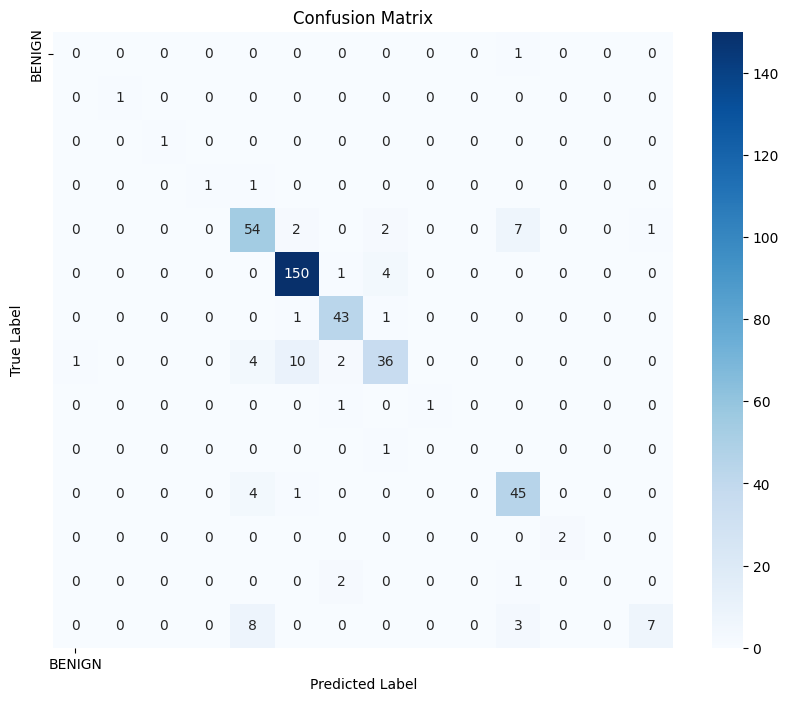

In [ ]:
#Normal method
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv('Dataset-Unicauca-Version2-87Atts.csv')

# Select relevant columns
relevant_columns = ['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration',
                    'Total.Fwd.Packets', 'Total.Backward.Packets', 'Label', 'ProtocolName']

data = data[relevant_columns]

# Drop rows with missing values
data.dropna(inplace=True)

# Limit the number of lines
max_lines = 2000
data = data.head(max_lines)

# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['Source.IP', 'Destination.IP'])

# Encode the 'Label' column
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

# Split the dataset into features (X) and target variable (y)
X = data.drop('ProtocolName', axis=1)
y = data['ProtocolName']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForestClassifier model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy after tuning: 0.8525
                precision    recall  f1-score   support

        AMAZON       0.00      0.00      0.00         1
 CONTENT_FLASH       1.00      1.00      1.00         1
      FACEBOOK       1.00      1.00      1.00         1
         GMAIL       1.00      0.50      0.67         2
        GOOGLE       0.76      0.82      0.79        66
          HTTP       0.91      0.97      0.94       155
  HTTP_CONNECT       0.88      0.96      0.91        45
    HTTP_PROXY       0.82      0.68      0.74        53
     MICROSOFT       1.00      0.50      0.67         2
         SKYPE       0.00      0.00      0.00         1
           SSL       0.79      0.90      0.84        50
WINDOWS_UPDATE       1.00      1.00      1.00         2
         YAHOO       0.00      0.00      0.00         3
       YOUTUBE       0.88      0.39      0.54        18

      accuracy         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


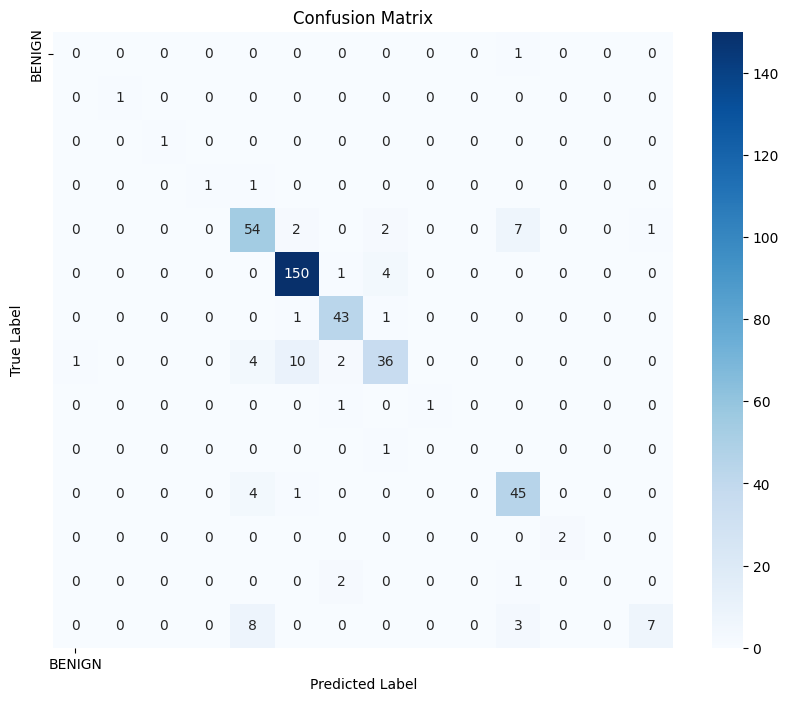

In [ ]:
#grid search improving method
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv('Dataset-Unicauca-Version2-87Atts.csv')

# Select relevant columns
relevant_columns = ['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration',
                    'Total.Fwd.Packets', 'Total.Backward.Packets', 'Label', 'ProtocolName']

data = data[relevant_columns]

# Drop rows with missing values
data.dropna(inplace=True)

# Limit the number of lines
max_lines = 2000
data = data.head(max_lines)

# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['Source.IP', 'Destination.IP'])

# Encode the 'Label' column
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

# Split the dataset into features (X) and target variable (y)
X = data.drop('ProtocolName', axis=1)
y = data['ProtocolName']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model for prediction
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after tuning:", accuracy)
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy after tuning: 0.865
                precision    recall  f1-score   support

        AMAZON       0.86      0.46      0.60        26
 CONTENT_FLASH       1.00      1.00      1.00        13
       DROPBOX       0.67      0.67      0.67         3
      FACEBOOK       1.00      0.80      0.89        10
         GMAIL       1.00      0.70      0.82        10
        GOOGLE       0.81      0.82      0.82       330
          HTTP       0.93      0.95      0.94       742
  HTTP_CONNECT       0.85      0.93      0.89       201
    HTTP_PROXY       0.81      0.79      0.80       243
     MICROSOFT       0.95      0.83      0.88        23
           MSN       0.86      0.86      0.86         7
         MSSQL       0.00      0.00      0.00         1
  MS_ONE_DRIVE       0.00      0.00      0.00         3
         SKYPE       1.00      0.20      0.33         5
           SSL       0.80

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


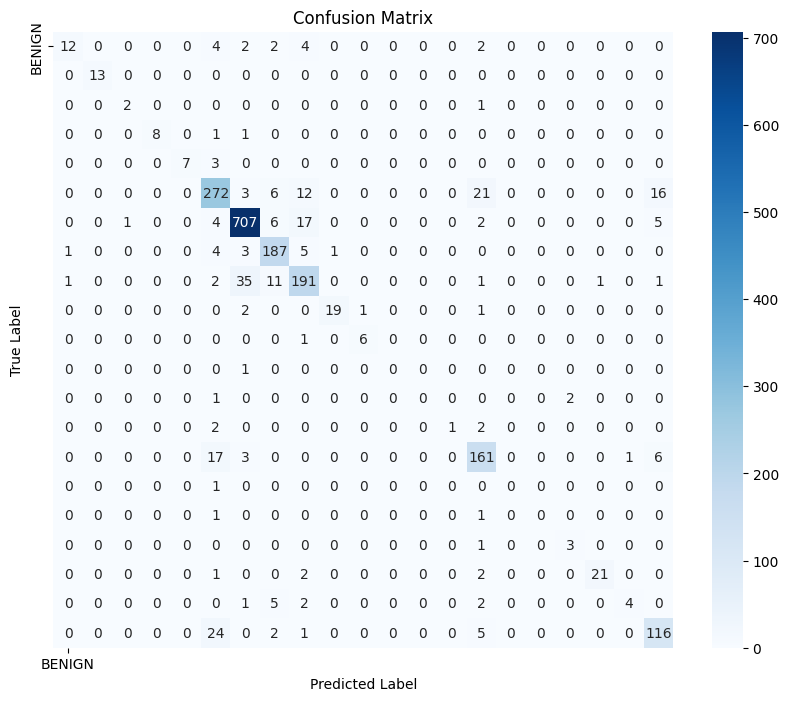

In [ ]:
#grid search improving method with *5 lines
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv('Dataset-Unicauca-Version2-87Atts.csv')

# Select relevant columns
relevant_columns = ['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Flow.Duration',
                    'Total.Fwd.Packets', 'Total.Backward.Packets', 'Label', 'ProtocolName']

data = data[relevant_columns]

# Drop rows with missing values
data.dropna(inplace=True)

# Limit the number of lines
max_lines = 10000
data = data.head(max_lines)

# Encode categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['Source.IP', 'Destination.IP'])

# Encode the 'Label' column
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

# Split the dataset into features (X) and target variable (y)
X = data.drop('ProtocolName', axis=1)
y = data['ProtocolName']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model for prediction
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after tuning:", accuracy)
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()